In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px

In [15]:
df=pd.read_csv('/content/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['Date', 'Passengers']
df.sort_values(by='Date', ascending=True)
df.isna().sum()

Date          0
Passengers    0
dtype: int64

In [18]:
#df.set_index('Month', inplace=True)
df.index = pd.to_datetime(df.index)
df.set_index('Date', inplace=True)

In [19]:
df.dropna(inplace=True)

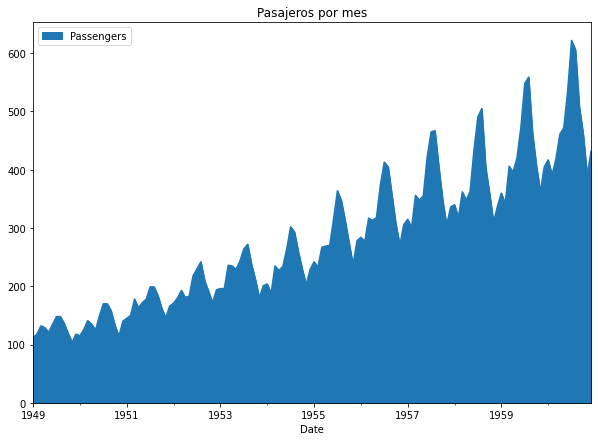

In [20]:
df.plot(kind='area',figsize=(10,7),title='Pasajeros por mes')

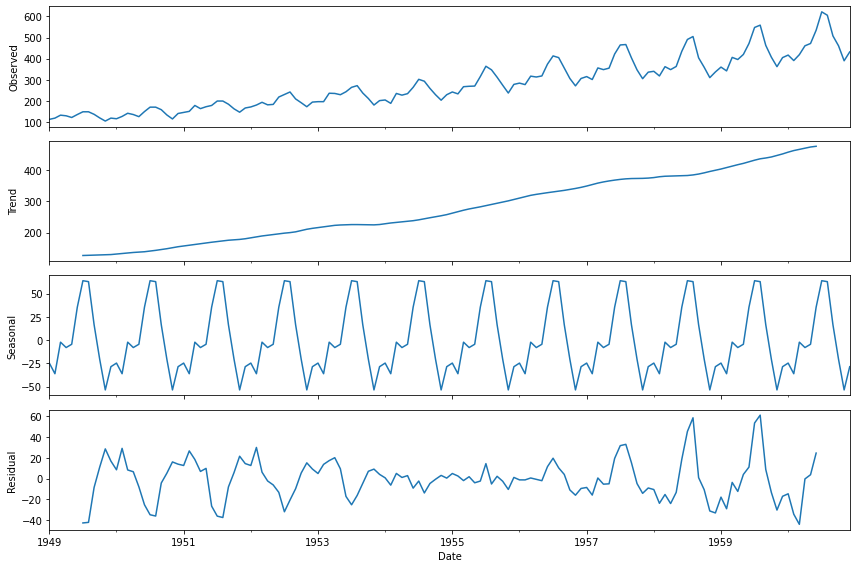

In [27]:
# Descomposición
decomp_viz = seasonal_decompose(df, model = 'Additive')
fig = decomp_viz.plot()
fig.set_size_inches((12, 8))
fig.tight_layout()
plt.show()

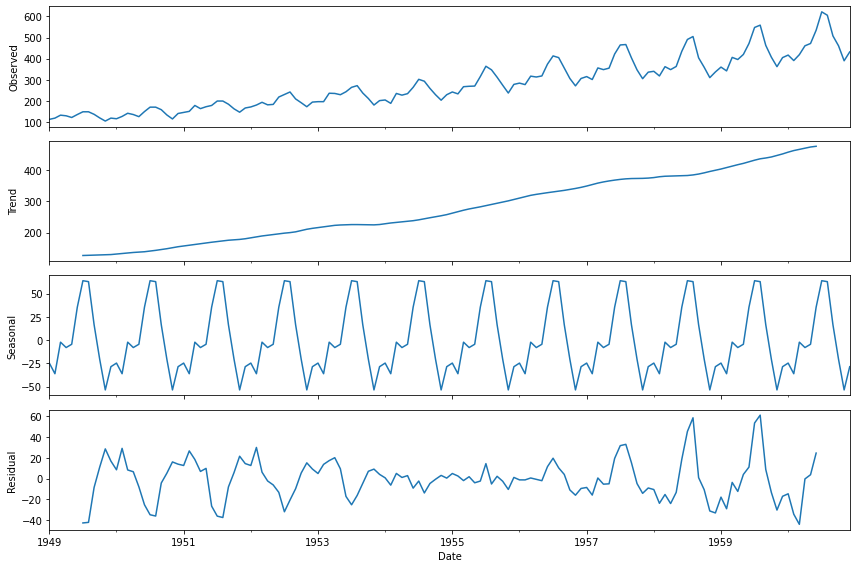

In [26]:
# Descomposición
decomp_viz = seasonal_decompose(df, model = 'Multiplicative')
fig = decomp_viz.plot()
fig.set_size_inches((12, 8))
fig.tight_layout()

plt.show()

In [23]:
def medias_moviles_simple ( df, perC, perL): 
    data = df.copy()
    data['MMC'] = df.iloc[: , 0].rolling(perC).mean().shift(1)
    data['MML'] = df.iloc[: , 0].rolling(perL).mean().shift(1)
    return data

In [24]:
data = medias_moviles_simple(df, 4, 6)
fig = px.line(data, x=data.index, y=['Passengers', 'MMC', 'MML'])
fig.show()